Tn = 3.1416


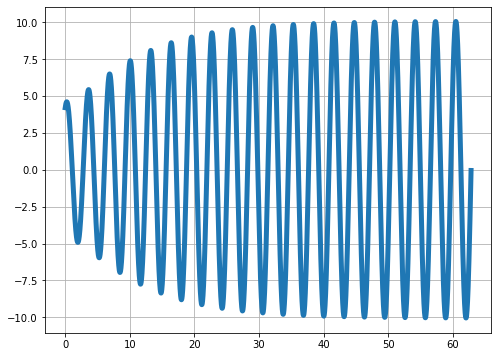

max|fT(t)| = 10.0424


In [84]:
import numpy as np

m = 1.0
k = 4.0
xi = 0.05
wn = (k/m)**0.5
Tn = 2*np.pi/wn
print("Tn = %6.4f"%Tn)
w = wn*0.999
c = 2.0*m*xi*wn
wD = wn*(1-xi**2)**0.5

Rd = 1/((1-(w/wn)**2)**2+(2*xi*(w/wn))**2)**0.5
phi = np.arctan(2*xi*(w/wn)/(1-(w/wn)**2))
#IC
u0 = 1.0
v0 = 1.0
p0 = 1.0

def u(t):
    c1 = u0-(p0/k)*Rd*np.cos(phi)
    c2 = v0/wD + xi*wn/wD*c1 - w/wD*p0/k*Rd*np.sin(phi)
    uh = np.exp(-xi*wn*t)*(c1*np.cos(wD*t) + c2*np.sin(wD*t))
    up = p0/k*Rd*np.cos(w*t - phi)
    return uh + up

def v(t):
    c1 = u0-(p0/k)*Rd*np.cos(phi)
    c2 = v0/wD + xi*wn/wD*c1 - w/wD*p0/k*Rd*np.sin(phi)
    duh = -xi*wn*np.exp(-xi*wn*t)*(c1*np.cos(wD*t) + c2*np.sin(wD*t)) + \
            wD*np.exp(-xi*wn*t)*(-c1*np.sin(wD*t) + c2*np.cos(wD*t))
    dup = -w*p0/k*Rd*np.sin(w*t - phi)
    return duh + dup

def fT(t):
    return k*u(t) + c*v(t) 

# set time
N = 10001
EndTime = 20.0*np.pi
tns = np.linspace(0, EndTime, N)
fns = np.zeros(N)

# run
for i in range(N):
    t = tns[i]
    fns[i] = fT(t)
    
# plot
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(tns , fns, lw=5)
plt.grid(True)
plt.show()

print("max|fT(t)| = %6.4f"%max(np.abs(fns[500:])))

In [85]:
Rd = 1/(2*xi)
fmax = p0*Rd*(( 1 + (2*xi)**2)**0.5)

print("max value = %6.4f"%fmax) 

max value = 10.0499


In [86]:
fmax = p0*np.sqrt(1+pow(1/(2*xi), 2))
print("max value = %6.4f"%fmax) 

max value = 10.0499


In [87]:
u0 = p0/k
fmax = p0 - m*(w**2)*Rd*p0/k
print("max value = %6.4f"%fmax)

max value = -8.9800
